In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv(r"C:\Users\omkar\AI\30Days30ProjectChallenge\Day1\data\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [40]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [3]:
df_t = pd.read_csv(r"C:\Users\omkar\AI\30Days30ProjectChallenge\Day1\data\test (1).csv")
df_t.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df_t.shape

(418, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [8]:
mean_age = df['Age'].mean()

In [9]:
df['Age'] = df['Age'].fillna(mean_age)
df_t['Age'] = df_t['Age'].fillna(mean_age)
df_t['Fare'] = df_t['Fare'].fillna(df_t['Fare'].mean())
df_t['Embarked'] = df_t['Embarked'].fillna(df_t['Embarked'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

<Axes: xlabel='Cabin', ylabel='Fare'>

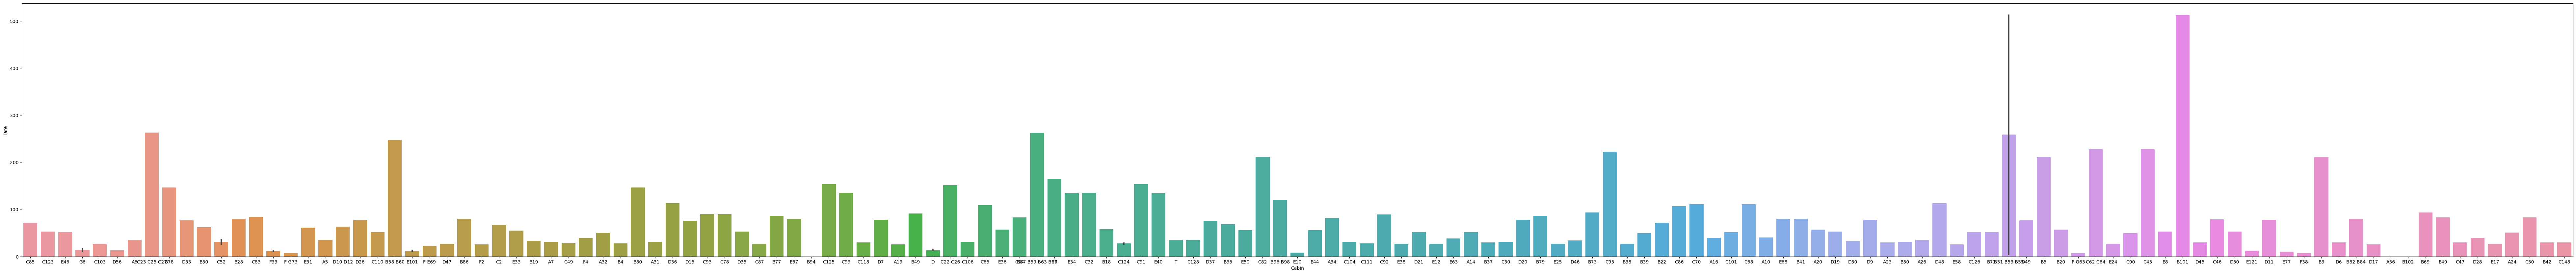

In [12]:
plt.figure(figsize=(100,10))
sns.barplot(df, y="Fare", x="Cabin")

In [13]:
agg_df = df.groupby('Cabin').agg({
    'Fare':['mean'],
    'Age':['mean'],
    'PassengerId':'count'
})

In [14]:
agg_df = agg_df.reset_index()

In [15]:
agg_df.columns = [
    '_'.join(col).strip('_') if isinstance(col,tuple) else col
    for col in agg_df.columns
]

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146]),
 [Text(0, 0, 'A10'),
  Text(1, 0, 'A14'),
  Text(2, 0, 'A16'),
  Text(3, 0, 'A19'),
  Text(4, 0, 'A20'),
  Text(5, 0, 'A23'),
  Text(6, 0, 'A24'),
  Text(7, 0, 'A26'),

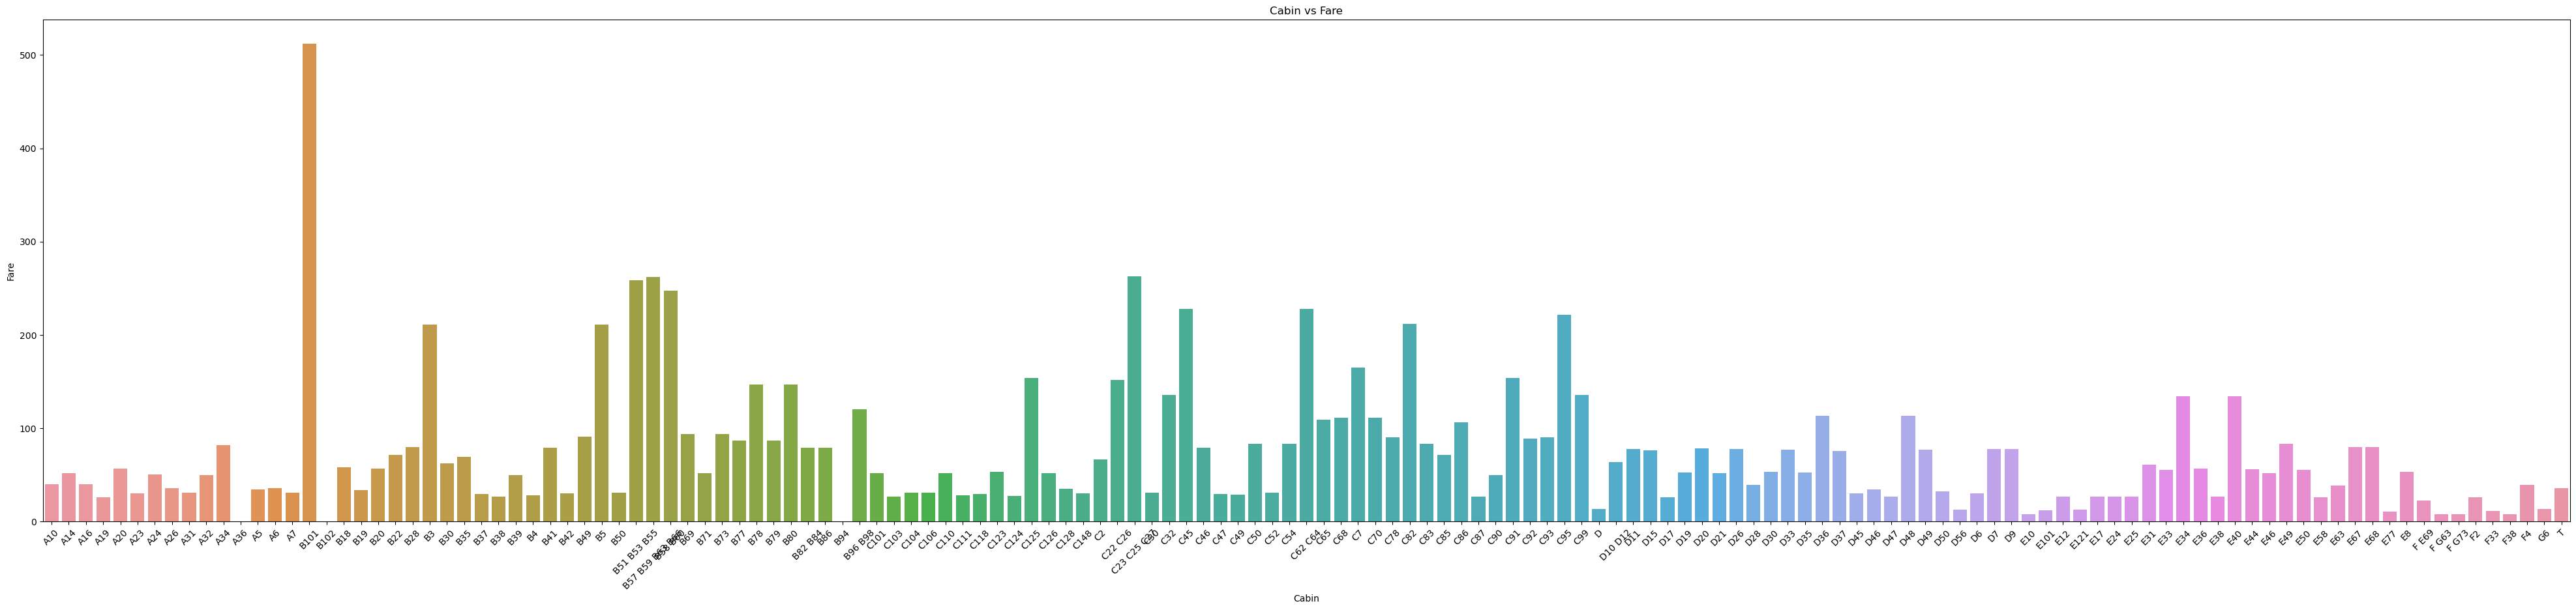

In [16]:
plt.figure(figsize=(50,10))
sns.barplot(agg_df, x="Cabin",y="Fare_mean")
plt.xlabel('Cabin')
plt.ylabel('Fare')
plt.title("Cabin vs Fare")
plt.xticks(rotation=45)

In [17]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

<Axes: xlabel='Cabin', ylabel='count'>

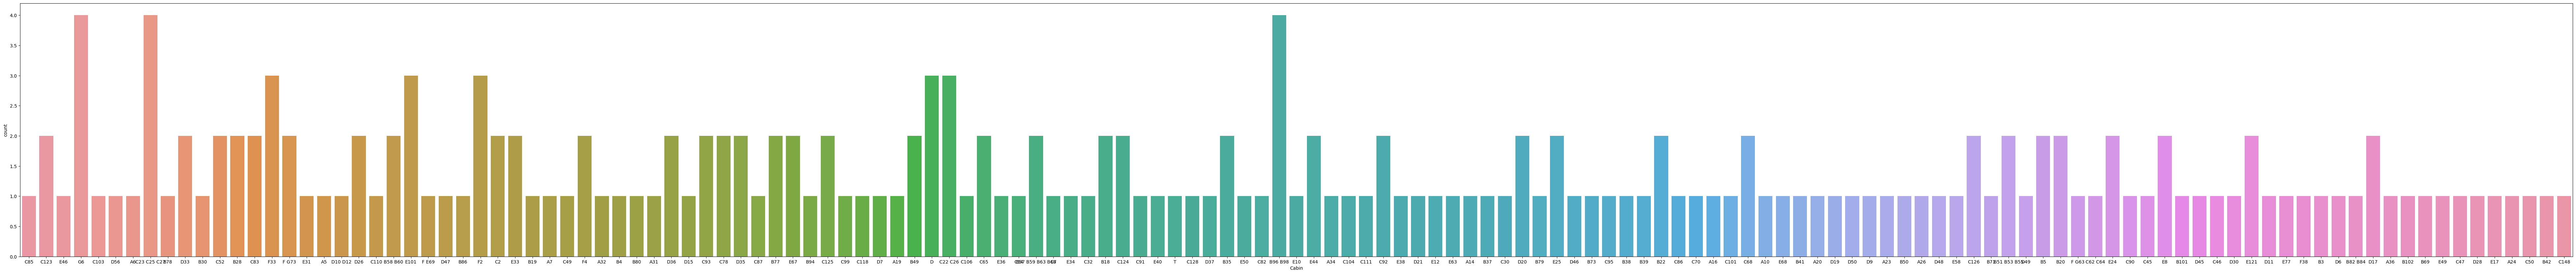

In [18]:
plt.figure(figsize=(100,10))
sns.countplot(df,x='Cabin')

In [19]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                   'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                   'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle','Ms'],'Miss')
df['Title'] = df['Title'].replace('Mme','Mrs')
df_t['Title'] = df_t['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_t['Title'] = df_t['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                   'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                   'Jonkheer', 'Dona'], 'Rare')
df_t['Title'] = df_t['Title'].replace(['Mlle','Ms'],'Miss')
df_t['Title'] = df_t['Title'].replace('Mme','Mrs')

In [20]:
df = df.drop(['PassengerId','Name','Cabin','Ticket'],axis='columns')

In [21]:
df_t = df_t.drop(['PassengerId','Name','Cabin','Ticket'],axis='columns')

In [22]:
df['Sex'] = pd.get_dummies(df['Sex'], drop_first=True).astype(int)
df_t['Sex'] = pd.get_dummies(df_t['Sex'], drop_first=True).astype(int)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,Mr
1,1,1,0,38.0,1,0,71.2833,C,Mrs
2,1,3,0,26.0,0,0,7.9250,S,Miss
3,1,1,0,35.0,1,0,53.1000,S,Mrs
4,0,3,1,35.0,0,0,8.0500,S,Mr


1 - Male , 0 - Female

In [24]:
mapping = {
    'C':1,
    'S':2,
    'Q':3
}

df['Embarked'] = df['Embarked'].map(mapping)
df_t['Embarked'] = df_t['Embarked'].map(mapping)

In [25]:
mapping = {
    'Mr': 1,
    'Mrs':2,
    'Miss':3,
    'Master':4,
    'Rare':5
}
df['Title'] = df['Title'].map(mapping)
df_t['Title'] = df_t['Title'].map(mapping)

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2,1
1,1,1,0,38.0,1,0,71.2833,1,2
2,1,3,0,26.0,0,0,7.9250,2,3
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,1


In [27]:
df_t.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,34.5,0,0,7.8292,3,1
1,3,0,47.0,1,0,7.0000,2,2
2,2,1,62.0,0,0,9.6875,3,1
3,3,1,27.0,0,0,8.6625,2,1
4,3,0,22.0,1,1,12.2875,2,2


In [28]:
X = df.drop('Survived',axis='columns')
y = df['Survived']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.1,penalty='l2')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_t_pred = lr.predict(X_train)
print(f"Training Accuracy:- {accuracy_score(y_train,y_t_pred)}")
print(f"Testing Accuracy:- {accuracy_score(y_test,y_pred)}")

Training Accuracy:- 0.8075842696629213
Testing Accuracy:- 0.7988826815642458


C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    n_jobs=-1
)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
y_t_pred = rfc.predict(X_train)
print(f"Training Accuracy:- {accuracy_score(y_train,y_t_pred)}")
print(f"Testing Accuracy:- {accuracy_score(y_test,y_pred)}")

Training Accuracy:- 0.8567415730337079
Testing Accuracy:- 0.8324022346368715


In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



In [34]:
from sklearn.ensemble import AdaBoostClassifier
rfc = AdaBoostClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
y_t_pred = rfc.predict(X_train)
print(f"Training Accuracy:- {accuracy_score(y_train,y_t_pred)}")
print(f"Testing Accuracy:- {accuracy_score(y_test,y_pred)}")

Training Accuracy:- 0.8258426966292135
Testing Accuracy:- 0.7988826815642458


In [35]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc,X,y,cv=5)
score.mean()

0.8103383340656581

In [36]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'max_depth': [3, 4, 5, 6, 7]}
# grid = GridSearchCV(rfc, param_grid, cv=5)
# grid.fit(X_train,y_train)
# print("Best params:", grid.best_params_)
# print("Best CV score:", grid.best_score_)

In [37]:
feature_imps = pd.Series(
    rfc.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print(feature_imps)

Title       0.316401
SibSp       0.280266
Fare        0.104902
Pclass      0.102290
Parch       0.073026
Age         0.058368
Embarked    0.034637
Sex         0.030110
dtype: float64


In [38]:
import pickle
with open('titanic_model.pkl','wb') as file:
    pickle.dump(rfc,file)
print("Model Saved Successfully")

Model Saved Successfully


In [41]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2,1
1,1,1,0,38.0,1,0,71.2833,1,2
2,1,3,0,26.0,0,0,7.9250,2,3
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,1
